# Classification Modeling

In [15]:
import classifiers as clf

import pickle

import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling  import SMOTE
from imblearn.over_sampling  import SMOTENC

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Load Species Data

In [2]:
species = pd.read_pickle("../Data/species.pkl")
species.head()

,Scientific Name,Common Name,Group,Federal Listing Status,VIP,State,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
0,Accipiter gentilis,Northern goshawk,Birds,Not Listed,V,AL,32413,22877
1,Acipenser fulvescens,Lake sturgeon,Fishes,Not Listed,V,AL,32413,22877
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,Threatened,V,AL,32413,22877
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,Not Listed,I,AL,32413,22877
4,Agrimonia incisa,Incised groovebur,Flowering Plants,Not Listed,P,AL,32413,22877


### Set Target and Feature Variables

In [3]:
# Create target variables
y = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create target variables
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name', 'VIP', 'State', 'Group'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
0,32413,22877
1,32413,22877
2,32413,22877
3,32413,22877
4,32413,22877


### Create Training and Test Sets

In [4]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_sets = pd.DataFrame({'Train':        y_train.value_counts(),
                          'Test':         y_test.value_counts(),
                          'Train Normal': y_train.value_counts() / y_train.count(),
                          'Test Normal':  y_test.value_counts()  / y_test.count()})

data_sets.loc['Total'] = data_sets.sum().astype(int)
data_sets

,Train,Test,Train Normal,Test Normal
Not Listed,6928,1747,0.763248,0.769604
Endangered,1511,373,0.166465,0.164317
Threatened,638,150,0.070288,0.066079
Total,9077,2270,1.000000,0.000000


### Classification Model Hyper Parameter Grid Search

In [5]:
# define parameter grid search for all classifiers
classifiers = []

# dummy classifier
classifiers.append(
    clf.grid_search_dummy_classifier(dict(
        strategy=['most_frequent','stratified'])))

# logistic regression
classifiers.append(
    clf.grid_search_logistic_regression(dict(
        C=[1e-2,1e0,1e2,1e6,1e12],
        penalty=['l1', 'l2'],
        fit_intercept=[True, False],
        multi_class=['ovr'],
        solver=['liblinear'])))

# gaussian naive bayes classifer

# k nearest neighbors classifier
classifiers.append(
    clf.grid_search_k_neighbors_classifier(dict(
        n_neighbors=[5,11],
        weights=['uniform', 'distance'],
        algorithm=['ball_tree','kd_tree'],
        leaf_size=[100,200])))

# decision tree classifier
classifiers.append(
    clf.grid_search_decision_tree_classifier(dict(
        criterion=['gini','entropy'],
        max_depth=[6,8],
        min_samples_leaf=[20,50,100],
        max_features=[2],
#        max_features=[20,30,40],
        min_impurity_decrease=[0.01,0.03,0.05])))

# random forest classifier
classifiers.append(
    clf.grid_search_random_forest_classifier(dict(
        n_estimators=[100,200,300],
        max_depth=[2,3,4],
        min_samples_leaf=[100,200],
        max_features=[2],
#        max_features=[10,20],
        min_impurity_decrease=[0.01,0.03,0.05])))

# ada boost classifer
classifiers.append(
    clf.grid_search_ada_boost_classifier(dict(
        n_estimators=[100,200,300],
        learning_rate=[0.5,1.0])))

### Baseline Classification Models

In [6]:
# run baseline dataset
baseline = clf.fit_predict_measure('Baseline', X_train, X_test, y_train, y_test, y_labels, classifiers)
baseline

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1524s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0676s.) Setting batch_size=4.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.6s
[Paralle

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   32.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.8s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score
0,Baseline,Dummy,{'strategy': 'most_frequent'},Train,0.763248,0.582547,0.763248,0.660766
1,Baseline,Dummy,{'strategy': 'stratified'},Train,0.614190,0.619143,0.616173,0.608195
2,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.769604,0.592290,0.769604,0.669404
3,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.763248,0.582547,0.763248,0.660766
4,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.763248,0.582547,0.763248,0.660766
5,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.763248,0.582547,0.763248,0.660766
6,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.763248,0.582547,0.763248,0.660766
7,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.763248,0.582547,0.763248,0.660766
8,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.763248,0.582547,0.763248,0.660766
9,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.763248,0.582547,0.763248,0.660766


In [8]:
# statistics of baseline classifiers (test and training sets)
baseline.describe()

,Accuracy,Precision,Recall,F1 Score
count,140.000000,140.000000,140.000000,140.000000
mean,0.756399,0.588167,0.756414,0.660695
std,0.020965,0.014586,0.020869,0.005785
min,0.614190,0.582547,0.616173,0.608195
25%,0.763248,0.582547,0.763248,0.660766
50%,0.763248,0.582547,0.763248,0.660766
75%,0.763248,0.582547,0.763248,0.660766
max,0.769604,0.672158,0.769604,0.688947


In [7]:
# best estimators of baseline dataset
baseline_test = baseline[baseline['Split'] == 'Test']
baseline_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score
40,Baseline,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200, '...",Test,0.713656,0.672158,0.713656,0.688947
2,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.769604,0.592290,0.769604,0.669404
23,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Test,0.769604,0.592290,0.769604,0.669404
77,Baseline,Decision Tree,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",Test,0.769604,0.592290,0.769604,0.669404
132,Baseline,Random Forest,"{'max_depth': 2, 'max_features': 2, 'min_impur...",Test,0.769604,0.592290,0.769604,0.669404
139,Baseline,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Test,0.769604,0.592290,0.769604,0.669404


### Handling Class Imbalance with SMOTENC Oversampling

In [94]:
X_train_smote.shape

(20784, 2)

In [92]:
# balance classes with SMOTE oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

# balanced data set statistics
smote_sets = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                           'Test Normal':  y_test.value_counts()  / y_test.count()})

smote_sets.loc['Total'] = smote_sets.sum().astype(int)
smote_sets

,Train,Test,Train Normal,Test Normal
Endangered,6928,373,0.333333,0.164317
Not Listed,6928,1747,0.333333,0.769604
Threatened,6928,150,0.333333,0.066079
Total,20784,2270,1.000000,0.000000


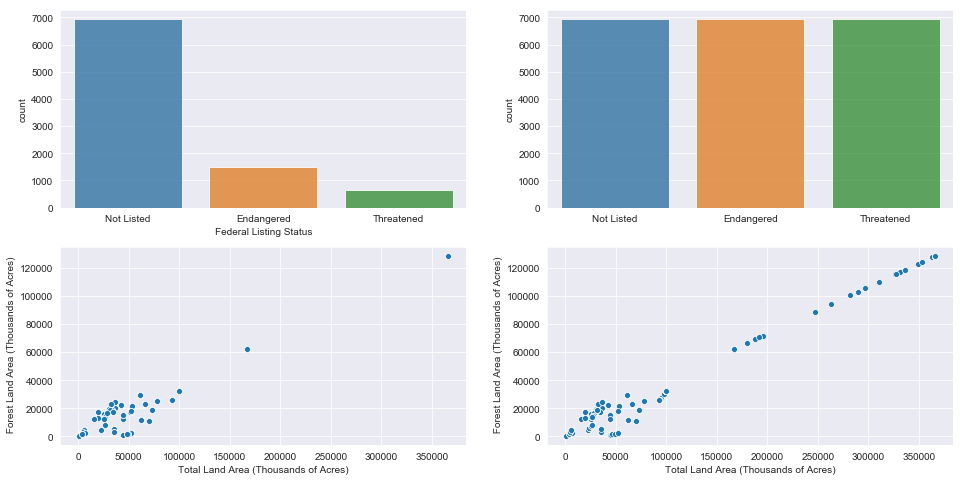

In [96]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(2, 2, figsize=(16,8))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])

### Balanced Classification Models

In [97]:
# run balanced dataset
balanced = clf.fit_predict_measure('Balanced', X_train_smote, X_test, y_train_smote, y_test, y_labels, classifiers)
balanced

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1632s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Paralle

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.2min remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score
0,Balanced,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667
1,Balanced,Dummy,{'strategy': 'stratified'},Train,0.330350,0.335185,0.332467,0.341428
2,Balanced,Dummy,{'strategy': 'stratified'},Test,0.344053,0.623081,0.344053,0.412025
3,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.424028,0.423443,0.424028,0.423237
4,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.365329,0.245838,0.365329,0.292702
5,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.365329,0.245838,0.365329,0.292702
6,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.365329,0.245838,0.365329,0.292702
7,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.423595,0.423048,0.423595,0.422746
8,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.365329,0.245838,0.365329,0.292702
9,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.365329,0.245838,0.365329,0.292702


In [98]:
# statistics of balanced classifiers (test and training sets)
balanced.describe()

,Accuracy,Precision,Recall,F1 Score
count,140.000000,140.000000,140.000000,140.000000
mean,0.373689,0.269039,0.373704,0.278098
std,0.047517,0.154376,0.047503,0.106332
min,0.108811,0.059106,0.108811,0.058443
25%,0.333333,0.111111,0.333333,0.166667
50%,0.365329,0.245838,0.365329,0.292702
75%,0.406082,0.392273,0.406082,0.375789
max,0.463915,0.706447,0.463915,0.518922


In [100]:
# best estimators of balanced dataset
balanced_test = balanced[balanced['Split'] == 'Test']
balanced_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score
139,Balanced,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Test,0.444934,0.703884,0.444934,0.518922
77,Balanced,Decision Tree,"{'criterion': 'entropy', 'max_depth': 6, 'max_...",Test,0.429956,0.706447,0.429956,0.511241
23,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Test,0.410132,0.685267,0.410132,0.475295
2,Balanced,Dummy,{'strategy': 'stratified'},Test,0.344053,0.623081,0.344053,0.412025
40,Balanced,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200, '...",Test,0.301762,0.647716,0.301762,0.329082
132,Balanced,Random Forest,"{'max_depth': 2, 'max_features': 2, 'min_impur...",Test,0.108811,0.059106,0.108811,0.058443


### Data Loading

In [ ]:
baseline.to_pickle('../Data/baseline.pkl')
balanced.to_pickle('../Data/balanced.pkl')